# Convolution 컨볼루션

In [16]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
%matplotlib inline

In [3]:
np.convolve([1,2,3], [1,1,1])

array([1, 3, 6, 5, 3])

[1,2,3] -> [0,0,1,2,3,0,0]으로 '0' 2개를 패딩으로 붙인다.  
따라서 각 원소의 과정은 다음과 같다.

In [5]:
print(np.sum(np.array([0,0,1]) * np.array([1,1,1])))
print(np.sum(np.array([0,1,2]) * np.array([1,1,1])))

print(np.sum(np.array([1,2,3]) * np.array([1,1,1])))

print(np.sum(np.array([2,3,0]) * np.array([1,1,1])))
print(np.sum(np.array([3,0,0]) * np.array([1,1,1])))

1
3
6
5
3


In [27]:
np.convolve([1,2,3],[1,2])

array([1, 4, 7, 6])

In [31]:
print(np.sum(np.array([0,0,1]) * np.array([1,2])))
print(np.sum(np.array([0,1,2]) * np.array([1,2])))

print(np.sum(np.array([1,2,3]) * np.array([1,2])))

print(np.sum(np.array([2,3,0]) * np.array([1,2])))
print(np.sum(np.array([3,0,0]) * np.array([1,2])))

0
2
5
8
3


위의 계산 전에도 양쪽에 2개의 패딩을 추가했다.  
default는 'full'로 되어 있으며 이것의 출력 형태는 (N+M-1)이다.  
즉, ([1,2,3], [1,1,1])의 경우 3 + 3 - 1 = 5의 형태로 출력이 되며, ([1,2,3],[1,2])의 경우 3 + 2 - 1 = 4의 형태로 출력되는 것을 발견할 수 있다.

In [33]:
# 값이 떨어지는 부분을 찾으세요.
# full : 기본, CNN에서 사용하지 않음
# same : 필요한 경우에만 패딩을 사용하여 src, out의 길이를 같게 만듭니다.
# valid : 패딩 사용 안함
x = [1,2,3,4,5]
same = np.convolve(x, [1,2], 'same')
valid = np.convolve(x, [1,2], 'valid')
same, valid

(array([ 1,  4,  7, 10, 13]), array([ 4,  7, 10, 13]))

In [ ]:
np.convolve([1,2,3,4,5,4,5,6,7,8,7,8,9,10,11,10,11,12], [-1,0,1,0])

$y = W*X + b$ 

In [20]:
# 더 정밀한 필터
2*np.convolve([1,2,3,4,5,4,5,6,7,8,7,8,9,10,11,10,11,12], [-5, 5, 0], 'same')

array([-10, -10, -10, -10,  10, -10, -10, -10, -10,  10, -10, -10, -10,
       -10,  10, -10, -10, 120])

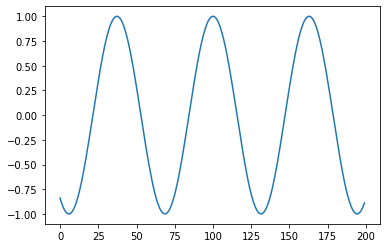

In [21]:
# 봉우리의 x값을 찾으세요(가장 높은 값)
src = np.cos(np.arange(-10, 10, 0.1))
plt.plot(src)

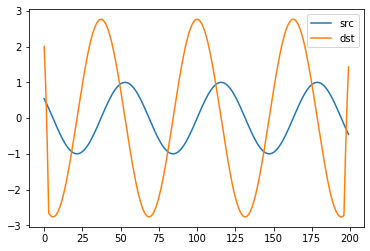

In [23]:
x = np.arange(-10, 10, 0.1)
src = np.sin(x)
# dst = np.convolve(src, [-1,0,1,2,1,0,-1]) # 값이 올라갔다 내려오는 위치
dst = np.convolve(src, [3,2,1,0,-1,-2,-3], 'same') # 값이 떨어지는 위치
plt.plot(src, label='src')
plt.plot(dst, label='dst')
plt.legend()

In [25]:
dst

array([ 2.00577603,  0.88895961, -0.69971057, -2.6633115 , -2.72508957,
       -2.75963944, -2.7666159 , -2.74594925, -2.69784599, -2.62278674,
       -2.52152147, -2.39506199, -2.24467185, -2.07185369, -1.87833424,
       -1.66604711, -1.43711338, -1.19382049, -0.93859934, -0.67400002,
       -0.40266631, -0.12730929,  0.14931976,  0.42445686,  0.69535292,
        0.95930125,  1.21366455,  1.45590133,  1.68359121,  1.89445921,
        2.0863984 ,  2.25749099,  2.40602747,  2.53052372,  2.62973582,
        2.70267246,  2.74860489,  2.76707418,  2.75789577,  2.72116138,
        2.65723804,  2.56676446,  2.45064462,  2.31003875,  2.14635173,
        1.96121908,  1.75649057,  1.53421179,  1.29660368,  1.04604032,
        0.78502528,  0.51616653,  0.24215041, -0.0342852 , -0.31037824,
       -0.58337008, -0.85053308, -1.10919784, -1.35677986, -1.59080538,
       -1.8089361 , -2.00899253, -2.18897577, -2.34708749, -2.48174789,
       -2.59161148, -2.67558054, -2.73281609, -2.76274625, -2.76

In [36]:
input = np.array([1,2,3,4,5,6]).reshape((1,2,3,1)).astype(np.float32)
filter = np.array([1,2,3,4]).reshape((2,2,1,1)).astype(np.float32)
tf.nn.conv2d(input, filter, strides=[1,1,1,1], padding="VALID")

<tf.Tensor: id=2, shape=(1, 1, 2, 1), dtype=float32, numpy=
array([[[[37.],
         [47.]]]], dtype=float32)>

input의 reshape -> 데이터의 수가 1개, (2X3)인 행렬, 1개의 채널  
filter의 reshape -> 데이터의 수가 1개, (2X1)인 행렬, 1개의 채널  
strides는 필터의 이동 보폭을 의미 즉, 필터가 input 데이터를 1칸씩 이동하며 계산한다는 의미이다.  
data_format은 기본적으로 'NHWC'로 설정되어있다. => reshape을 의미, c(채널)이 같아야 한다.

---
10 X 10 X 1의 흑백 이미지를 2장 만들어서 임의의 위치에 '+' 패턴을 그려서 필터로 찾아보자

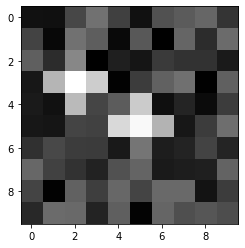

In [53]:
y = np.array([[[3,3], [7,7]], [[2,3],[5,5]]])
x = np.zeros((2, 10, 10, 1)) # (데이터의 갯수, height(행), width(열), channel)
x += np.random.rand(2,10,10,1) # 노이즈

for i in range(len(y)):
    label = y[i] # step 1: [[3,3], [7,7]] step 2: [[2,3], [5,5]]
    for j in range(len(label)):
        point = label[j] # step 1: [3,3] step 2: [7,7]
        px = point[0] # step 1: 3 step 2: 7
        py = point[1] # step 1: 3 step 2: 7
        x[i, py-1:py+2, px] += 1 # step 1: 1번 이미지의 2, 3, 4 행 3열 +1
        x[i, py, px-1:px+2] += 1 # step 1: 1번 이미지의 3행 2, 3, 4열 +1
plt.imshow(x[1,:,:,0], cmap='gray') # 패턴확인

**Convolution의 특징**
- 이동 불변성 shift invariant: 찾으려는 정보가 어디에 있던 하나의 가중치를 공유하여 사용하기 때문에 찾을 수 있다.
- 가중치 공유 weight sharing: DNN의 경우 각 원소(데이터)마다 가중치가 부여되지만 CNN에서는 필터라는 가중치를 슬라이드하는 방식을 이용하여 가중치를 공유한다. 그러므로 많은 메모리가 필요하지 않다.

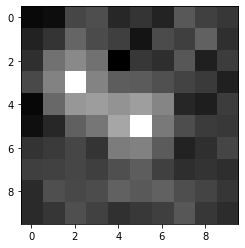

In [55]:
filter = np.array([0,1,0,1,1,1,0,1,0], dtype=np.float32).reshape((3,3,1,1))
# out = tf.nn.conv2d(x, filter, [1,1,1,1], padding="VALID")
out = tf.nn.conv2d(x, filter, [1,1,1,1], padding="SAME")
plt.imshow(out[1,:,:,0], cmap='gray')

MAX POOLING => 특정 구역에서 가장 큰 값을 추출하는 방법  
1. 데이터의 사이즈를 줄이는 효과가 있다.
2. 찾으려는 특징이 더 강하게 표현된다.

주로 2X2의 크기, 즉 4개의 데이터 중 1개의 가장 큰 수를 선택한다. 따라서 결과적으로 데이터의 크기(행렬의 크기)가 $1 \over 4$로 줄어들게 된다.

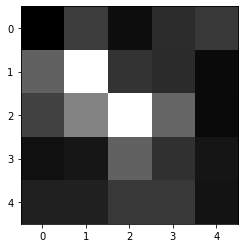

In [59]:
filter = np.array([0,1,0,1,1,1,0,1,0], dtype=np.float32).reshape((3,3,1,1))
# out = tf.nn.conv2d(x, filter, 1, padding="VALID")
out = tf.nn.conv2d(x, filter, 1, padding="SAME")
out = tf.nn.max_pool(out, 2, 2, padding='SAME')
plt.imshow(out[1,:,:,0], cmap='gray')

In [62]:
from sklearn.datasets import load_digits
data = load_digits()
x = data.images
y = data.target
x.shape, y.shape

((1797, 8, 8), (1797,))

In [75]:
model = keras.Sequential()
model.add(keras.layers.Conv2D(32, (3,3), padding='same', input_shape=(8,8,1))) # 필터 갯수 32, 크기 [3,3]
model.add(keras.layers.MaxPool2D((2,2), padding='same'))
model.add(keras.layers.Conv2D(64, (3,3), padding='same'))
model.add(keras.layers.MaxPool2D((2,2), padding='same'))
model.add(keras.layers.Flatten()) # 1D로 모양 바꾸기
model.add(keras.layers.Dense(10, activation=keras.layers.Softmax())) # 클래스가 10개 이므로
model.compile(loss=keras.losses.SparseCategoricalCrossentropy(), metrics=['accuracy'])

In [74]:
# 두 번째 conv 필터의 수 32개
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 8, 8, 32)          320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 4, 4, 32)          0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 4, 4, 32)          9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 2, 2, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 128)               0         
_________________________________________________________________
dense (Dense)                (None, 10)                1290      
Total params: 10,858
Trainable params: 10,858
Non-trainable params: 0
__________________________________________________

In [76]:
# 두 번째 conv 필터의 수 64개
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 8, 8, 32)          320       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 32)          0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 4, 4, 64)          18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 2, 2, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                2570      
Total params: 21,386
Trainable params: 21,386
Non-trainable params: 0
__________________________________________________

In [78]:
x_4d = np.expand_dims(x, -1)
# yy = np.stack((y,y), -1)
model.fit(x_4d, y, epochs=2)

Train on 1797 samples
Epoch 1/2
1797/1797 [==============================] - 2s 1ms/sample - loss: 1.0416 - accuracy: 0.7312
Epoch 2/2
1797/1797 [==============================] - 0s 194us/sample - loss: 0.2533 - accuracy: 0.9221


In [79]:
model.predict(x_4d[:1])

array([[9.9627519e-01, 5.1373841e-06, 5.6307955e-04, 1.8981791e-05,
        6.2713712e-05, 2.3041105e-04, 5.1856794e-05, 1.6528259e-03,
        3.6901841e-04, 7.7074690e-04]], dtype=float32)